In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('display.max_colwidth', 5000)

In [2]:
abs_path = '../data/user_study/survey/'

survey = pd.read_csv(abs_path+'survey.csv', delimiter=',')

# 1. Survey

## 1.1. Demographics

In [73]:
degree = survey.iloc[:,1].values.tolist()
from collections import Counter
counter_degree = Counter(degree)
counter_degree

Counter({'B.Sc.': 7, 'M.Sc.': 8, 'PhD': 4})

In [75]:
survey.iloc[:,2].describe()

count    19.000000
mean      2.421053
std       0.961237
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: How would you rate your experience in GUI Prototyping?, dtype: float64

In [77]:
survey.iloc[:,3].describe()

count    19.000000
mean      3.526316
std       1.020263
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: How would you rate your experience in software development?, dtype: float64

In [79]:
used_any_prototyping_tool_before = survey.iloc[:,4].values.tolist()
counter_tool = Counter(used_any_prototyping_tool_before)
counter_tool

Counter({'Yes': 13, 'No': 6})

In [81]:
tools_used = survey.iloc[:,5].values.tolist()
# Replace the first to using a comma separator and make it ready for tokeniztation
tools_used[0] = "PowerPoint, Photoshop"
tools = [elem.strip().lower() for tool in tools_used if str(tool) != 'nan'
              for elem in tool.split(',')]

In [82]:
counter_tools = Counter(tools)
counter_tools

Counter({'powerpoint': 9,
         'photoshop': 2,
         'moqups': 1,
         'balsamiq': 1,
         'power point': 1,
         'balsamiq mockups': 1,
         'adobe xd': 2,
         'xcode': 1,
         'draw.io': 1,
         'android studio': 1,
         'javafx': 1,
         'sharepoint': 1,
         'adobe indesign': 1,
         'gimp': 1})

## 1.2. Perceived Usefulness

### 1.2.1 How much did the approach support you during the prototyping process?

In [4]:
survey.iloc[:,6].describe()

count    19.000000
mean      3.736842
std       0.805682
min       2.000000
25%       3.500000
50%       4.000000
75%       4.000000
max       5.000000
Name: How much did the approach support you during the prototyping process?, dtype: float64

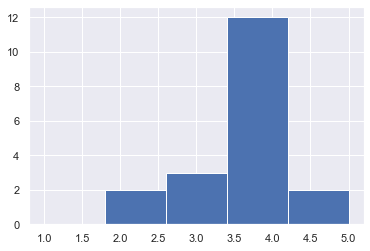

In [11]:
plt.hist(survey.iloc[:,6].values.tolist(), bins = 5, range=(1,5))
plt.show()

### 1.2.2 How relevant where the found GUI screens for your search query on average with the approach?

In [12]:
survey.iloc[:,7].describe()

count    19.000000
mean      3.631579
std       0.683986
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: How relevant where the found GUI screens for your search query on average with the approach?, dtype: float64

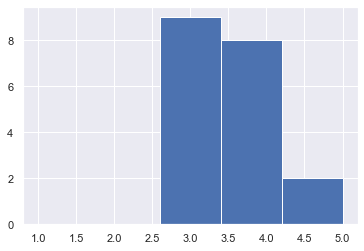

In [13]:
plt.hist(survey.iloc[:,7].values.tolist(), bins = 5, range=(1,5))
plt.show()

### 1.2.3 How much did the GUI search results support you during the prototyping process with the approach?

In [14]:
survey.iloc[:,8].describe()

count    19.000000
mean      4.210526
std       0.787327
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: How much did the GUI search results support you during the prototyping process with the approach?, dtype: float64

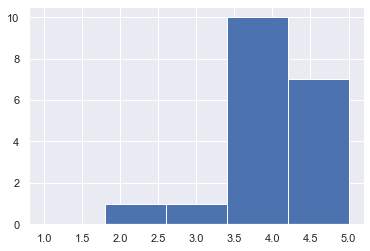

In [15]:
plt.hist(survey.iloc[:,8].values.tolist(), bins = 5, range=(1,5))
plt.show()

### 1.2.4 Did the GUI search results help you in better visualizing how the screen could look like with the approach?

In [16]:
survey.iloc[:,9].describe()

count    19.000000
mean      4.473684
std       0.611775
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Did the GUI search results help you in better visualizing how the screen could look like with the approach?, dtype: float64

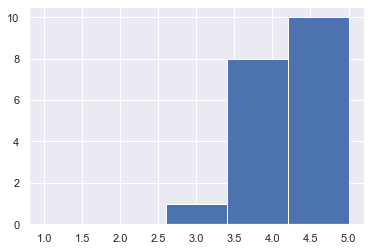

In [17]:
plt.hist(survey.iloc[:,9].values.tolist(), bins = 5, range=(1,5))
plt.show()

### 1.2.5 Summary

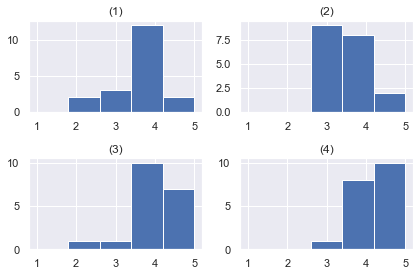

In [18]:
f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(survey.iloc[:,(6+idx)].values.tolist(), bins = 5, range=(1,5))
    ax.set_title('({})'.format(idx+1))
plt.tight_layout()

In [92]:
abs_path = '../Plots/'
f.savefig(abs_path+"usability.pdf")

## 1.3. System Usability Scale

In [97]:
def compute_sus(data):
    sus = 0
    for i in range(0,10):
        if i%2 == 0: 
            sus += (data[i] - 1)
        else:
            sus += (5 - data[i])
    return sus * 2.5

In [98]:
sus = []
for index, row in survey.iterrows():
    scores = row.iloc[10:20].values.tolist()
    sus_score = compute_sus(scores)
    sus.append(sus_score)

In [99]:
np.mean(sus)

81.57894736842105

# 1.4. Free-Form Feedback

### 1.4.1 What did you like about the tool?

In [100]:
[elem for elem in survey.iloc[:,20].values.tolist() if str(elem) != 'nan']

['Easy to use and user friendly',
 'Simpleness',
 'Search bar for similar prototypes',
 'many examples mockups which made it easy to integrate several icons; very easy to use',
 'Very Easy To Use',
 'Quick and fitting search results, which supported the design of the use case which I had to design',
 'it is simple to use and enables me to reuse existing screens and edit them as needed',
 'Clean UI, Auto-Correct',
 'Easy to use, easy search, no previous knowledge necessary, nice and relevant templates',
 'Helped with GUI-suggestions and was easy to use.',
 'I like that you can search with terms or sentences that might be relevant for your prototype and then get inspiration from the screens that are displayed as a search result for your own GUI. In addition, it is very nice that you can simply drag and drop components from existing GUIs to anywhere where you need them.',
 'The Visualization of finished GUIs and the ability to reuse other GUIs',
 'Seeing real GUIs for inspiration and bein

### 1.4.2. What did you not like about the tool?

In [101]:
[elem for elem in survey.iloc[:,21].values.tolist() if str(elem) != 'nan']

['-',
 'Some standard features were not included like ctrl-c',
 'The GUI',
 'some functions are missing like coloring the background of a label, different fonts (like they where in the first Mockup Tool)',
 'Many functionalities were missing, not very in-depth',
 'There could be more convenience features like multi-selection, resizing and so on',
 'nothing as i do not miss anything for the tasks to solve in the study',
 'Missing customizability functions after selecting a base GUI template',
 'No keyboard shortcuts like copy or paste, no adjustment for the forms and buttons, no support of selecting multiple objects',
 'It would be nice if buttons and images could be resized. Another minor function that might be quite helpful is a revert function that is able to revert recent actions.',
 'GUI elements are sometimes not compatible with each other and there are not enough options to modify them.',
 "There's no unified design for the GUIs, which makes everything look a bit random. And ther

### 1.4.3. Improvement Suggestions

In [102]:
[elem for elem in survey.iloc[:,22].values.tolist() if str(elem) != 'nan']

['Currently it would be sufficient, but with new requirements more ideas would pop up (like adding own templates)',
 'Nicer look and feel of the prototyping software',
 'adding functions like different fonts, background coloring, adding own images or icons',
 'Incorporate more functionalities from the MockupClassic tool (e.g. Change size more easily, more components to add, ...)',
 'As I said I would like to have more convenience features or to be able to modify copied UI-Components further for example',
 '-',
 'keyboard shortcuts like copy or paste, adjustment for the forms and buttons, support of selecting multiple objects, zoom',
 'Allow the import of own images and icons',
 "More simple components in addition to the real GUIs - then you don't have to find every small icon somewhere in an app.",
 'Enable more keyboard shortcuts for the existing commands like copy (also see prev. answer).',
 'Auto suggestions for relevant/additional search terms to find a template more quickly',
 'Re

# 2. Experiments Analysis

### 2.1 Cliff's Delta

In [27]:
from __future__ import division


def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

### 2.2. Load and Transform Datasets

In [19]:
abs_path = '../data/user_study/data/processed/'

data_basic = pd.read_csv(abs_path+'#gui_comps.csv', delimiter=';')
data_contents = pd.read_csv(abs_path+'#gui_comps_div.csv', delimiter=';')
data_unwanted = pd.read_csv(abs_path+'#gui_comps_neg.csv', delimiter=';')

In [20]:
def transform_data(dataframe):
    # Reads in the dataset and aligns the tools task scores due to different orderings of the tool in the experiments
    matrix = []
    for index, row in dataframe.iterrows():
        if row['condition'] == 3 or row['condition'] == 4:
            row = np.concatenate(( row[12:17].values, row[17:22].values, row[2:7].values, row[7:12].values))
        else:
            row = np.concatenate((row[2:7].values, row[7:12].values, row[12:17].values, row[17:22].values))
        print(row)
        matrix.append(row)
    return np.array(matrix)

In [ ]:
matrix_data_basic = transform_data(data_basic)

In [ ]:
matrix_data_contents = transform_data(data_contents)

In [ ]:
matrix_data_unwanted = transform_data(data_unwanted)

In [24]:
matrix_data_basic_diff = matrix_data_basic - matrix_data_unwanted
matrix_data_diff_clipped = matrix_data_basic_diff.clip(min=0)

### 2.3. Compute Metrics

In [45]:
def compute_metrics_for_all(data):
    i = 0
    j = 10
    while j+5 < len(data[0]):
        a = data[:,i]
        a_2 = data[:,i+5]
        a = np.concatenate((a, a_2))
        b = data[:,j]
        b_2 = data[:,j+5]
        b = np.concatenate((b, b_2))
        wilcoxon_test = stats.wilcoxon(a, b, alternative='greater')
        time = (i % 5) + 3
        delta = cliffsDelta(a, b)
        print('Time: {}'.format(time))
        print('Cliffs Delta: {}'.format(delta))
        print(wilcoxon_test)
        i += 1
        j += 1

In [46]:
compute_metrics_for_all(matrix_data_basic)

Time: 3
Cliffs Delta: (0.8074792243767313, 'large')
WilcoxonResult(statistic=692.0, pvalue=1.3676324145565396e-07)
Time: 4
Cliffs Delta: (0.7846260387811634, 'large')
WilcoxonResult(statistic=685.5, pvalue=2.289943205643291e-07)
Time: 5
Cliffs Delta: (0.7562326869806094, 'large')
WilcoxonResult(statistic=656.5, pvalue=1.8143125581020158e-07)
Time: 6
Cliffs Delta: (0.6724376731301939, 'large')
WilcoxonResult(statistic=659.0, pvalue=1.7153050077007518e-06)
Time: 7
Cliffs Delta: (0.6585872576177285, 'large')
WilcoxonResult(statistic=688.5, pvalue=1.959728429830535e-06)


In [47]:
compute_metrics_for_all(matrix_data_contents)

Time: 3
Cliffs Delta: (0.8095567867036011, 'large')
WilcoxonResult(statistic=692.0, pvalue=1.3543588830882402e-07)
Time: 4
Cliffs Delta: (0.8095567867036011, 'large')
WilcoxonResult(statistic=693.0, pvalue=1.2743060634749818e-07)
Time: 5
Cliffs Delta: (0.8047091412742382, 'large')
WilcoxonResult(statistic=661.5, pvalue=1.1956129538882513e-07)
Time: 6
Cliffs Delta: (0.8344875346260388, 'large')
WilcoxonResult(statistic=732.0, pvalue=7.773842634364274e-08)
Time: 7
Cliffs Delta: (0.8081717451523546, 'large')
WilcoxonResult(statistic=695.0, pvalue=1.0765608826684907e-07)


In [48]:
compute_metrics_for_all(matrix_data_diff_clipped)

Time: 3
Cliffs Delta: (0.6620498614958449, 'large')
WilcoxonResult(statistic=612.5, pvalue=5.563643606787014e-06)
Time: 4
Cliffs Delta: (0.6516620498614959, 'large')
WilcoxonResult(statistic=581.0, pvalue=6.518465139967833e-06)
Time: 5
Cliffs Delta: (0.6045706371191135, 'large')
WilcoxonResult(statistic=598.0, pvalue=1.554314535400486e-05)
Time: 6
Cliffs Delta: (0.5124653739612188, 'large')
WilcoxonResult(statistic=577.0, pvalue=0.00033251551090017245)
Time: 7
Cliffs Delta: (0.481994459833795, 'large')
WilcoxonResult(statistic=545.0, pvalue=0.000430119279966971)


### 2.4. Visualize the Data

In [31]:
def transform_to_dataframe(data):
    comps = []
    tool = []
    mins = []
    for i in range(0, len(data[0])):
        comps.extend(data[:,i])
        if i >= 10: tool.extend(['Mockplus' for j in range(0, len(data[:,i]))])
        else: tool.extend(['RaWi' for j in range(0, len(data[:,i]))])
        mins.extend([(i%5)+3 for j in range(0, len(data[:,i]))])
    data = {'#GUI-comps': comps, 'Minutes': mins, 'Approach': tool}
    return pd.DataFrame.from_dict(data)

In [33]:
dataframe_data_basic = transform_to_dataframe(matrix_data_basic)
dataframe_data_diff_clipped = transform_to_dataframe(matrix_data_diff_clipped)
dataframe_data_contents = transform_to_dataframe(matrix_data_contents)
dataframe_data_unwanted = transform_to_dataframe(matrix_data_unwanted)

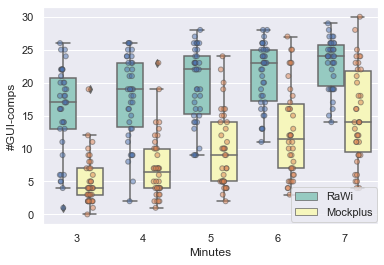

In [34]:
ax = sns.boxplot(x="Minutes", y="#GUI-comps", hue="Approach", data=dataframe_data_basic, palette="Set3")
ax = sns.stripplot(y='#GUI-comps', x='Minutes', hue="Approach",
                   data=dataframe_data_basic, dodge=True,
                   #jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   linewidth=1,edgecolor='gray')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.74, 0.17), loc=2, borderaxespad=0.)

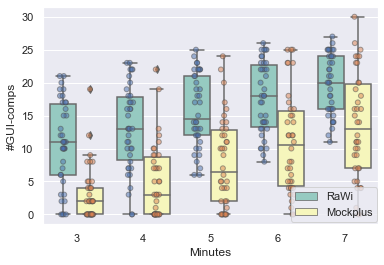

In [35]:
ax = sns.boxplot(x="Minutes", y="#GUI-comps", hue="Approach", data=dataframe_data_diff_clipped, palette="Set3")
ax = sns.stripplot(y='#GUI-comps', x='Minutes', hue="Approach",
                   data=dataframe_data_diff_clipped, dodge=True,
                   #jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   linewidth=1,edgecolor='gray')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.74, 0.17), loc=2, borderaxespad=0.)

In [37]:
dataframe_data_contents = dataframe_data_contents.rename(columns={'#GUI-comps': '#GUI-comps-div'})

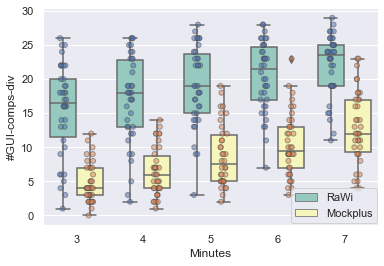

In [38]:
ax = sns.boxplot(x="Minutes", y="#GUI-comps-div", hue="Approach", data=dataframe_data_contents, palette="Set3")
ax = sns.stripplot(y="#GUI-comps-div", x='Minutes', hue="Approach",
                   data=dataframe_data_contents, dodge=True,
                   #jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   linewidth=1,edgecolor='gray')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.74, 0.17), loc=2, borderaxespad=0.)

In [39]:
dataframe_data_unwanted = dataframe_data_unwanted.rename(columns={'#GUI-comps': '#GUI-comps-neg'})

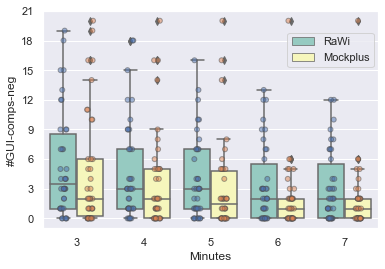

In [40]:
ax = sns.boxplot(x="Minutes", y='#GUI-comps-neg', hue="Approach", data=dataframe_data_unwanted, palette="Set3")
#ax.set(ylim=(0, 30))
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax = sns.stripplot(y='#GUI-comps-neg', x='Minutes', hue="Approach",
                   data=dataframe_data_unwanted, dodge=True,
                   #jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   linewidth=1,edgecolor='gray')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.73, 0.9), loc=2, borderaxespad=0.)